In [1]:
# Read uspto dataset
import pandas as pd
import numpy as np
import nltk


df = pd.read_csv('./dataset/AbstractDataset/df-Abstract.csv')
df = df.rename(columns={'No': 'ID', 'Title': 'Title', 'Abstract': 'Abstract', 'Subclass_labels': 'cpc_subclass'})
df_Abstract=df[["ID","Title","Abstract","cpc_subclass"]]
df_Abstract= df_Abstract.dropna()
df_Abstract = df_Abstract.reset_index(drop=True)
df_Abstract.head()

,ID,Title,Abstract,cpc_subclass
0,US07072141,magnetic disc unit with range of gap between d...,a magnetic disc unit having a rotating disc ty...,['G11B']
1,US06981282,systems and methods for transformable suits,methods and systems for transforming a volume ...,['A41D']
2,US06981283,gardening gloves with cushion insert to protec...,a gardening glove or the like designed to prev...,['A41D']
3,US06981284,hockey helmet comprising a lateral adjustment ...,a hockey helmet for receiving a head of a wear...,['A63B']
4,US06981285,toilet and method of operation,a toilet and toilet system suitable for a boat...,['E03D']


In [2]:
#filter base on the H section
df_Abstract_uspto = df_Abstract[df_Abstract['cpc_subclass'].str.contains(r'\bH[\w]*|,[\s]*H[\w]*')]
df_Abstract_uspto.head()

,ID,Title,Abstract,cpc_subclass
19,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L']
20,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']"
57,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S']
58,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K']
59,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K']


In [3]:
len(df_Abstract_uspto)

595466

In [4]:
df_Abstract_uspto["Abstract"]= df_Abstract_uspto["Abstract"].dropna()
df_Abstract_uspto = df_Abstract_uspto.reset_index(drop=True)
df_Abstract_uspto

C:\Users\admin\AppData\Local\Temp/ipykernel_4176/868608903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_uspto["Abstract"]= df_Abstract_uspto["Abstract"].dropna()


,ID,Title,Abstract,cpc_subclass
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L']
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']"
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S']
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K']
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K']
...,...,...,...,...
595461,US08975581,ion trap,an ion trap comprising a first array of magnet...,['H01J']
595462,US08976203,wavelength conversion device and image display...,a wavelength conversion device includes an exc...,"['G09G', 'G03B', 'H01S', 'H04N']"
595463,US08976510,cable assembly and electronic device,an electronic device including an electronic u...,"['H05K', 'H01R']"
595464,US08976819,circuit and method for metering electricity,a current detection module generates a first c...,"['H04J', 'G01R']"


In [5]:
df_Abstract_uspto=df_Abstract_uspto[:60000]
len(df_Abstract_uspto)

60000

# preprocessing

In [6]:
def cleantext(df_Abstract_uspto):
    # Remove unwanted characters like quotes, commas, periods, question marks, etc. from the 'Abstract' column
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['Abstract'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
    
    # Convert all text to lowercase
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].str.lower()
    
    # Remove all numbers from the 'cleaned_Abstract_text' column
    df_Abstract_uspto['cleaned_Abstract_text'] =df_Abstract_uspto['cleaned_Abstract_text'].replace(r'\d+', '', regex = True)
        
    # Remove all non-alphanumeric characters from the 'cleaned_Abstract_text' column
    df_Abstract_uspto['cleaned_Abstract_text']  = df_Abstract_uspto['cleaned_Abstract_text'].replace(r'[^a-zA-Z0-9]', " ", regex=True)
    
    # Remove all punctuation from the 'cleaned_Abstract_text' column
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)
    
    # Remove all URLs from the 'cleaned_Abstract_text' column
    df_Abstract_uspto['cleaned_Abstract_text']  = df_Abstract_uspto['cleaned_Abstract_text'].replace(r'https.*$', "", regex = True)
    
    # Replace multiple spaces with a single space
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].replace("   ", " ", regex = True)
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].replace("  ", " ", regex = True)
   
    return df_Abstract_uspto

# Call the 'cleantext' function on the 'df_Abstract_uspto' dataframe
df_Abstract_uspto = cleantext(df_Abstract_uspto)
df_Abstract_uspto.head()

C:\Users\admin\AppData\Local\Temp/ipykernel_4176/2232787442.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['Abstract'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
C:\Users\admin\AppData\Local\Temp/ipykernel_4176/2232787442.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].str.lower()
C:\Users\admin\AppData\Local\Temp/ipykernel_417

,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...


In [7]:
import nltk
from nltk.corpus import stopwords

# Load the stop words
nltk.download('stopwords')
english_stop_words = set(stopwords.words('english'))

# Define a set of patent-specific stop words
patent_stop_words = set(["invention", "apparatus", "method", "system", "device",
                         "means", "comprising", "having", "including", "wherein",
                         "according", "configured", "configured to", "configured for",
                         "one or more", "plurality", "at least", "said", "and/or",
                         "thereof", "thereto", "herein", "hereby", "hereof", "hereunder",
                         "hereto", "herewith", "respectively", "corresponding",
                         "respectively corresponding", "substantially", "generally",
                         "typically", "usually", "often", "frequently", "commonly",
                         "normally", "conventional", "traditional", "known", "prior",
                         "art", "field", "related", "disclosed", "described", "illustrated",
                         "embodiment", "example", "figure", "graph", "chart", "data",
                         "information", "section", "portion", "aspect", "aspect of",
                         "part", "feature", "detail", "particular", "certain", "some",
                         "many", "various", "multiple", "different", "differentiate",
                         "similar", "corresponding", "correspondingly", "also",
                         "in addition", "furthermore", "moreover", "additionally",
                         "especially", "particular", "particularity", "specific",
                         "specifically", "example", "exemplary", "illustrative",
                         "such as", "include", "includes", "including", "included",
                         "contain", "contains", "containing", "contained", "shown"])

# Merge the sets of stop words
stop_words = english_stop_words.union(patent_stop_words)

df_Abstract_uspto['cleaned_Abstract_text_without_Stopwprd'] = df_Abstract_uspto['cleaned_Abstract_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))
df_Abstract_uspto.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\admin\AppData\Local\Temp/ipykernel_4176/2358027427.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_uspto['cleaned_Abstract_text_without_Stopwprd'] = df_Abstract_uspto['cleaned_Abstract_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))


,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bumps formed el...
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...


In [8]:
# import the WordNetLemmatizer class from the nltk library
from nltk.stem import WordNetLemmatizer

# create an instance of the WordNetLemmatizer class
lemmatizer = WordNetLemmatizer()

# define a function to lemmatize words in a text
def lemmatize_words(text):
    # split the text into individual words, lemmatize each word, and join them back together into a string
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

# apply the lemmatize_words function to the cleaned abstract text without stopwords column of the dataframe
df_Abstract_uspto["Lemmatized-Abstract"] = df_Abstract_uspto["cleaned_Abstract_text_without_Stopwprd"].apply(lambda text: lemmatize_words(text))

# view the updated dataframe with the new lemmatized abstract column
df_Abstract_uspto.head()

C:\Users\admin\AppData\Local\Temp/ipykernel_4176/1233588646.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_uspto["Lemmatized-Abstract"] = df_Abstract_uspto["cleaned_Abstract_text_without_Stopwprd"].apply(lambda text: lemmatize_words(text))


,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd,Lemmatized-Abstract
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bumps formed el...,mounting ic chip circuit board bump formed ele...
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...,article footwear sole insole overlying sole in...
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...,electrical connector nonrigidly apply force se...
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...,flexible bar handler comprises mobile carriage...
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...,brush holder incorporates terminal integral co...


In [9]:
#tokenize corpus
nltk.download('punkt')

#tokenize a string into words
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

# Apply the tokenization function to each row of the 'text' column
df_Abstract_uspto['Abstract_tokens'] = df_Abstract_uspto["Lemmatized-Abstract"].apply(tokenize_text)
df_Abstract_uspto.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\admin\AppData\Local\Temp/ipykernel_4176/3692672784.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_uspto['Abstract_tokens'] = df_Abstract_uspto["Lemmatized-Abstract"].apply(tokenize_text)


,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd,Lemmatized-Abstract,Abstract_tokens
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bumps formed el...,mounting ic chip circuit board bump formed ele...,"[mounting, ic, chip, circuit, board, bump, for..."
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...,article footwear sole insole overlying sole in...,"[article, footwear, sole, insole, overlying, s..."
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...,electrical connector nonrigidly apply force se...,"[electrical, connector, nonrigidly, apply, for..."
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...,flexible bar handler comprises mobile carriage...,"[flexible, bar, handler, comprises, mobile, ca..."
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...,brush holder incorporates terminal integral co...,"[brush, holder, incorporates, terminal, integr..."


# divide the dataset

In [10]:
#Divide the dataset into different size
df_Abstract_20K=df_Abstract_uspto[:20000]
df_Abstract_20K

,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd,Lemmatized-Abstract,Abstract_tokens
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bumps formed el...,mounting ic chip circuit board bump formed ele...,"[mounting, ic, chip, circuit, board, bump, for..."
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...,article footwear sole insole overlying sole in...,"[article, footwear, sole, insole, overlying, s..."
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...,electrical connector nonrigidly apply force se...,"[electrical, connector, nonrigidly, apply, for..."
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...,flexible bar handler comprises mobile carriage...,"[flexible, bar, handler, comprises, mobile, ca..."
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...,brush holder incorporates terminal integral co...,"[brush, holder, incorporates, terminal, integr..."
...,...,...,...,...,...,...,...,...
19995,US07050507,adaptive throughput pulse width modulation com...,a signaling apparatus and system may include a...,['H04L'],a signaling apparatus and system may include a...,signaling may transmitter capable sending stro...,signaling may transmitter capable sending stro...,"[signaling, may, transmitter, capable, sending..."
19996,US07050508,method and system for frequency up conversion ...,a method and system is described wherein a sig...,"['H04B', 'H01Q']",a method and system is described wherein a sig...,signal lower frequency converted higher freque...,signal lower frequency converted higher freque...,"[signal, lower, frequency, converted, higher, ..."
19997,US07050509,digital isolation system with hybrid circuit i...,an improved digital capacitive isolation barri...,['H04B'],an improved digital capacitive isolation barri...,improved digital capacitive isolation barrier ...,improved digital capacitive isolation barrier ...,"[improved, digital, capacitive, isolation, bar..."
19998,US07050510,open loop diversity technique for systems empl...,when using four transmit antennas conventional...,"['H04B', 'H04L']",when using four transmit antennas conventional...,using four transmit antennas channel coding em...,using four transmit antenna channel coding emp...,"[using, four, transmit, antenna, channel, codi..."


In [37]:
New_Sample = df_Abstract_uspto.iloc[59394:59395, :]
New_Sample

,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd,Lemmatized-Abstract,Abstract_tokens
59394,US07187658,data transmission apparatus selecting efficien...,a data transmission apparatus is provided for ...,"['G06F', 'H04L']",a data transmission apparatus is provided for ...,transmission provided transmitting received us...,transmission provided transmitting received us...,"[transmission, provided, transmitting, receive..."


In [38]:
new_Abstract = str(New_Sample["Lemmatized-Abstract"].iloc[0])
new_Abstract

'transmission provided transmitting received user terminal network destination user terminal executing communication using internet protocol transmission routing table storing relating destination address address network table storing static dynamic network selection unit selecting one network transmission transmits destination based static dynamic transmission enables transmission appropriate network selecting appropriate network based static dynamic network'

# NMF on 20K patent data

In [16]:
import pandas as pd
from gensim.models import Phrases
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.models.nmf import Nmf
from gensim.models.coherencemodel import CoherenceModel

# Tokenize the abstracts
docs = [doc.split() for doc in df_Abstract_20K['Lemmatized-Abstract']]

# Apply n-gram (1,3)
bigram_phrases = Phrases(docs, min_count=10)
trigram_phrases = Phrases(bigram_phrases[docs], min_count=10)
#quadgram_phraser = Phrases(trigram_phrases[bigram_phrases[docs]])
docs = [trigram_phrases[bigram_phrases[doc]] for doc in docs]

# Create the dictionary and document-term matrix
id2word = Dictionary(docs)
id2word.filter_extremes(no_below=10, no_above=0.4)
corpus = [id2word.doc2bow(doc) for doc in docs]

# Compute tf-idf scores
tfidf = TfidfModel(corpus)
tfidf_corpus = tfidf[corpus]

# Train the NMF model
num_topics = 50
nmf_model = Nmf(tfidf_corpus, num_topics=num_topics, random_state=42)

# Transform the corpus to get the topic distribution for each document
nmf_output = nmf_model[tfidf_corpus]

# Calculate coherence metrics
cm_cv = CoherenceModel(model=nmf_model, corpus=tfidf_corpus, texts=docs, dictionary=id2word, coherence='c_v')
coherence_cv = cm_cv.get_coherence()

cm_npmi = CoherenceModel(model=nmf_model, texts=docs, corpus=tfidf_corpus, dictionary=id2word, coherence='c_npmi')
coherence_npmi = cm_npmi.get_coherence()

cm_umass = CoherenceModel(model=nmf_model, corpus=tfidf_corpus, dictionary=id2word, coherence='u_mass')
coherence_umass = cm_umass.get_coherence()

# Print the coherence scores
print('C_v coherence:', coherence_cv)
print('c_npmi coherence:', coherence_npmi)
print('u_mass coherence:', coherence_umass)

C_v coherence: 0.4272774413472316
c_npmi coherence: -0.01750167594568079
u_mass coherence: -4.792768849718406


In [17]:
  for i in range(num_topics):
    print(f"Topic {i}:")
    topic_words = [id2word[int(word_id)] for word_id, _ in nmf_model.show_topic(i, topn=10)]
    print(topic_words)

Topic 0:
['line', 'power', 'power_supply', 'cable', 'material', 'layer', 'conductive_layer', 'dielectric_layer', 'formed', 'connected']
Topic 1:
['rf', 'interface', 'wireless', 'pulse', 'delay', 'processor', 'set', 'rotor', 'generator', 'rate']
Topic 2:
['battery', 'control', 'receiver', 'signal', 'error', 'content', 'transmitter', 'controller', 'path', 'charging']
Topic 3:
['frame', 'region', 'clock', 'clock_signal', 'logic', 'time', 'source_drain_region', 'formed', 'peripheral', 'body']
Topic 4:
['value', 'element', 'pixel', 'transfer', 'device', 'target', 'error', 'set', 'read', 'rate']
Topic 5:
['switch', 'housing', 'plug', 'module', 'circuit', 'antenna', 'assembly', 'switching', 'electrical', 'satellite']
Topic 6:
['region', 'sample', 'module', 'function', 'level', 'type', 'trench', 'source', 'mask', 'upper']
Topic 7:
['terminal', 'connector', 'end', 'housing', 'connected', 'cable', 'connecting', 'portion', 'electrical', 'cover']
Topic 8:
['packet', 'network', 'router', 'flow', 'q

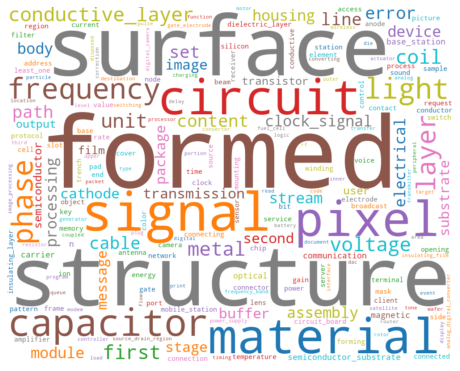

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all the words in all topics
all_topic_words = " ".join([id2word[int(word_id)] for i in range(num_topics) for word_id, _ in nmf_model.show_topic(i, topn=10)])

# Create a WordCloud object
wordcloud = WordCloud(width=1000, height=800, background_color="white", colormap="tab10")

# Generate a word cloud
wordcloud.generate(all_topic_words)

# Display the WordCloud image
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

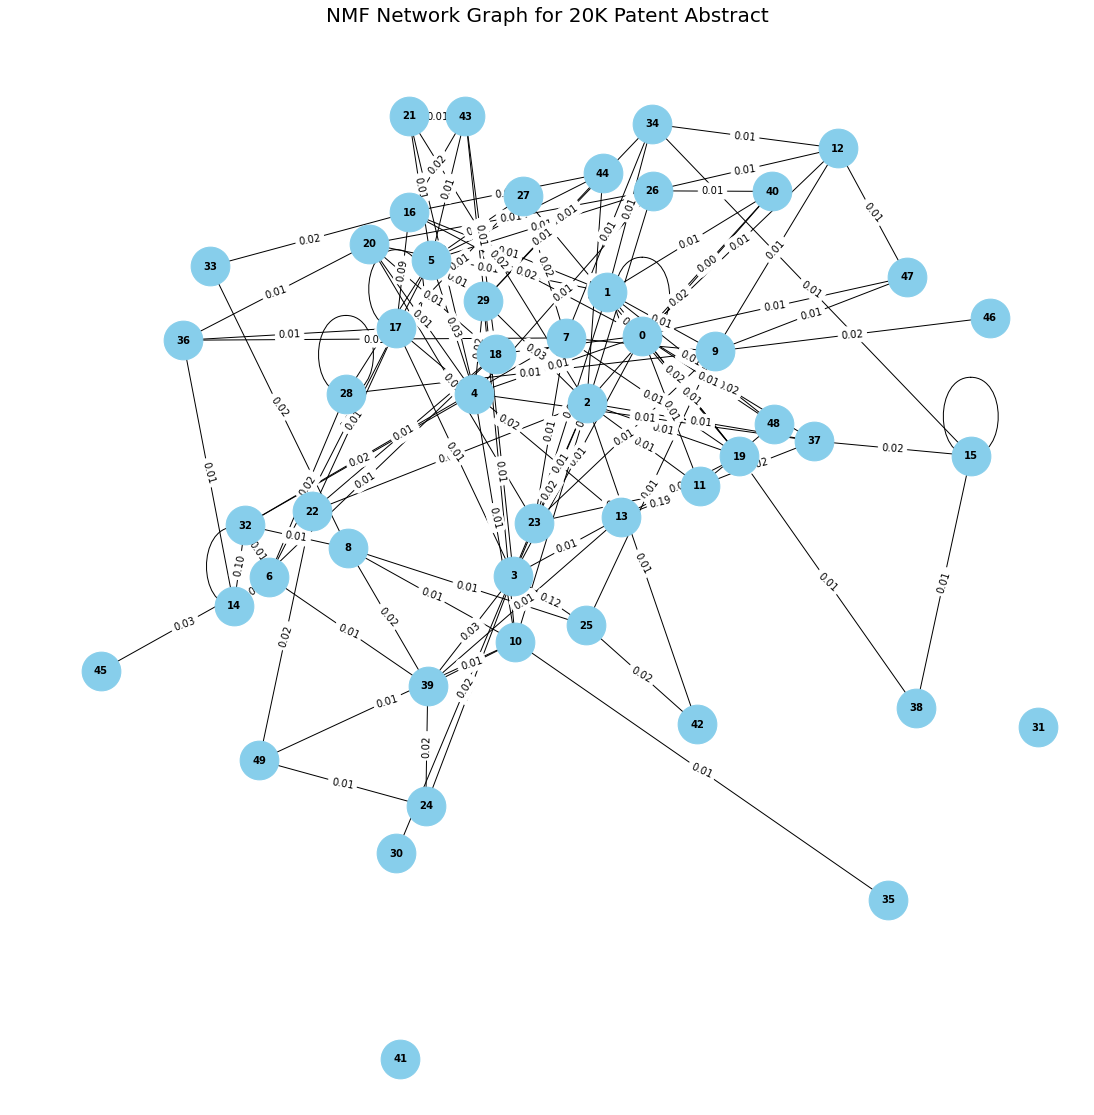

In [68]:
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt

# Get all the topic words
all_topic_words = " ".join([word for topic in nmf_model.show_topics(num_topics=50, formatted=False) for word, _ in topic[1]])

# Create a list of the most frequent words
most_frequent_words = [word for word, count in Counter(all_topic_words.split()).most_common(30)]

# Create an empty graph object
G = nx.Graph()

# Add the nodes (topics) to the graph
for i in range(50):
    G.add_node(i)

# Add the edges (terms) to the graph
for i in range(50):
    topic_words = nmf_model.show_topic(i, topn=10)
    for word, prob in topic_words:
        if word in most_frequent_words:
            j = most_frequent_words.index(word)
            G.add_edge(i, j, weight=prob)

# Draw the graph
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=1500, font_size=10, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels={(i, j): "{:.2f}".format(d["weight"]) for i, j, d in G.edges(data=True)})
plt.gcf().set_size_inches(15, 15)
plt.title("NMF Network Graph for 20K Patent Abstract",fontsize=20)
plt.show()

In [18]:
# Get the most probable topic and its probability for each document
doc_topics = [sorted(nmf_model.get_document_topics(doc), key=lambda x: x[1], reverse=True) for doc in nmf_output]

# Print the most probable topic and its probability for each document
# for i, doc in enumerate(doc_topics):
#     print(f"Document {i+1}:")
#     for topic, prob in doc:
#         print(f"Topic {topic}: {prob:.4f}")
#     print()

In [39]:
# Create empty columns for topic number and probability
df_Abstract_20K['nmf_topics'] = 0
df_Abstract_20K['nmf_prob'] = 0.0

# Loop through each document and update the corresponding row in the dataframe
for i, doc in enumerate(doc_topics):
    topic_num, topic_prob = doc[0]
    df_Abstract_20K.at[i, 'nmf_topics'] = topic_num
    df_Abstract_20K.at[i, 'nmf_prob'] = topic_prob

C:\Users\admin\AppData\Local\Temp/ipykernel_4176/3080982206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_20K['nmf_topics'] = 0
C:\Users\admin\AppData\Local\Temp/ipykernel_4176/3080982206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_20K['nmf_prob'] = 0.0


In [40]:
df_Abstract_20K

,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd,Lemmatized-Abstract,Abstract_tokens,nmf_topics,nmf_prob
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bumps formed el...,mounting ic chip circuit board bump formed ele...,"[mounting, ic, chip, circuit, board, bump, for...",29,0.282830
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...,article footwear sole insole overlying sole in...,"[article, footwear, sole, insole, overlying, s...",42,0.283444
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...,electrical connector nonrigidly apply force se...,"[electrical, connector, nonrigidly, apply, for...",42,0.288117
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...,flexible bar handler comprises mobile carriage...,"[flexible, bar, handler, comprises, mobile, ca...",30,0.228259
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...,brush holder incorporates terminal integral co...,"[brush, holder, incorporates, terminal, integr...",37,0.633241
...,...,...,...,...,...,...,...,...,...,...
19995,US07050507,adaptive throughput pulse width modulation com...,a signaling apparatus and system may include a...,['H04L'],a signaling apparatus and system may include a...,signaling may transmitter capable sending stro...,signaling may transmitter capable sending stro...,"[signaling, may, transmitter, capable, sending...",42,0.687113
19996,US07050508,method and system for frequency up conversion ...,a method and system is described wherein a sig...,"['H04B', 'H01Q']",a method and system is described wherein a sig...,signal lower frequency converted higher freque...,signal lower frequency converted higher freque...,"[signal, lower, frequency, converted, higher, ...",30,0.980607
19997,US07050509,digital isolation system with hybrid circuit i...,an improved digital capacitive isolation barri...,['H04B'],an improved digital capacitive isolation barri...,improved digital capacitive isolation barrier ...,improved digital capacitive isolation barrier ...,"[improved, digital, capacitive, isolation, bar...",42,0.306966
19998,US07050510,open loop diversity technique for systems empl...,when using four transmit antennas conventional...,"['H04B', 'H04L']",when using four transmit antennas conventional...,using four transmit antennas channel coding em...,using four transmit antenna channel coding emp...,"[using, four, transmit, antenna, channel, codi...",42,0.440972


In [41]:
df_Abstract_20K_topic=df_Abstract_20K[["ID","Title","Abstract","cpc_subclass","Lemmatized-Abstract", "nmf_topics", "nmf_prob"]]
df_Abstract_20K_topic

,ID,Title,Abstract,cpc_subclass,Lemmatized-Abstract,nmf_topics,nmf_prob
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],mounting ic chip circuit board bump formed ele...,29,0.282830
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article footwear sole insole overlying sole in...,42,0.283444
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],electrical connector nonrigidly apply force se...,42,0.288117
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],flexible bar handler comprises mobile carriage...,30,0.228259
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],brush holder incorporates terminal integral co...,37,0.633241
...,...,...,...,...,...,...,...
19995,US07050507,adaptive throughput pulse width modulation com...,a signaling apparatus and system may include a...,['H04L'],signaling may transmitter capable sending stro...,42,0.687113
19996,US07050508,method and system for frequency up conversion ...,a method and system is described wherein a sig...,"['H04B', 'H01Q']",signal lower frequency converted higher freque...,30,0.980607
19997,US07050509,digital isolation system with hybrid circuit i...,an improved digital capacitive isolation barri...,['H04B'],improved digital capacitive isolation barrier ...,42,0.306966
19998,US07050510,open loop diversity technique for systems empl...,when using four transmit antennas conventional...,"['H04B', 'H04L']",using four transmit antenna channel coding emp...,42,0.440972


In [42]:
#prediction

In [43]:
#query_tokens = quadgram_phraser[trigram_phrases[bigram_phrases[new_Abstract.split()]]]
query_tokens = trigram_phrases[bigram_phrases[new_Abstract.split()]]
query_bow = id2word.doc2bow(query_tokens)

# Get the topic distribution for the query
query_tfidf = tfidf[query_bow]
query_topic_dist = nmf_model[query_tfidf]

# Get the top 3 topics for the query
top_topics = sorted(query_topic_dist, key=lambda x: x[1], reverse=True)[:3]

# Print the top 3 topics with words and probabilities
for topic_id, topic_prob in top_topics:
    print(f"Topic {topic_id} (probability: {topic_prob:.2f})")

Topic 33 (probability: 0.44)
Topic 41 (probability: 0.36)
Topic 7 (probability: 0.11)


In [27]:
# filter the documents that have a predicted topic (for example here predicted topi for query is 33)

In [70]:
filter_topics_nmf=df_Abstract_20K_topic[df_Abstract_20K_topic['nmf_topics'] == 41]
filter_topics_nmf = filter_topics_nmf.sort_values('nmf_prob', ascending=False)
filter_topics_nmf = filter_topics_nmf.reset_index().rename(columns={'index': 'new_index'})
filter_topics_nmf

,new_index,ID,Title,Abstract,cpc_subclass,Lemmatized-Abstract,nmf_topics,nmf_prob
0,19799,US07050084,camera frame display,the present invention is directed to a video t...,['H04N'],present directed video telephony,41,0.249250
1,13431,US07023471,video quality assessment with test video seque...,a test video sequence for testing quality loss...,['H04N'],test video sequence testing quality loss proce...,41,0.212532
2,14731,US07027708,system and method for reproducing a video sess...,a client for reproducing a video session inclu...,['H04N'],client reproducing video session memory proces...,41,0.202188
3,5112,US07098957,method and apparatus for detecting repetitive ...,interlaced video signals are processed by mixi...,['H04N'],interlaced video signal processed mixing spati...,41,0.185945


In [46]:
#calculate the similarity between the query and document in dataset with the Doc2Vec embedding

In [47]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics.pairwise import cosine_similarity

# Convert the list of documents to a list of sentences
sentences = [doc.split() for doc in filter_topics_nmf['Lemmatized-Abstract'].tolist()]

# Create a list of TaggedDocument objects, where each TaggedDocument represents a single document in the corpus
# The words attribute of each TaggedDocument is set to a list of tokens for the corresponding document
# The tags attribute of each TaggedDocument is set to a list containing a single string, which is the index of the document in the corpus
tagged_data = [TaggedDocument(words=sentences[i], tags=[str(i)]) for i in range(len(sentences))]

# Train a Doc2Vec model on the tagged documents
# The vector_size parameter specifies the dimensionality of the document vectors
# The window parameter specifies the maximum distance between the predicted word and the context words within a sentence
# The min_count parameter specifies the minimum frequency of a word in the corpus to be included in the vocabulary
# The epochs parameter specifies the number of iterations over the corpus during training
model = Doc2Vec(tagged_data, vector_size=100, window=5, min_count=5, epochs=50)

# Infer the document vector for the new claim
# The split() method converts the string to a list of tokens
# The infer_vector() method calculates the document vector using the trained model
new_Abstarct_vector = model.infer_vector(new_Abstract.split())

# Calculate the cosine similarity between the new claim and the documents in the corpus
# The infer_vector() method is called for each document in the corpus to calculate the document vectors
doc_vectors = [model.infer_vector(sentences[i]) for i in range(len(sentences))]
similarity_scores = cosine_similarity([new_Abstarct_vector], doc_vectors)

In [73]:
# Add a new column to the dataframe to store the similarity scores
filter_topics_nmf['cosin_similarity_Doc2vec'] = similarity_scores[0]
filter_topics_nmf

,new_index,ID,Title,Abstract,cpc_subclass,Lemmatized-Abstract,nmf_topics,nmf_prob,cosin_similarity_Doc2vec
0,19799,US07050084,camera frame display,the present invention is directed to a video t...,['H04N'],present directed video telephony,41,0.249250,0.055717
1,13431,US07023471,video quality assessment with test video seque...,a test video sequence for testing quality loss...,['H04N'],test video sequence testing quality loss proce...,41,0.212532,-0.126498
2,14731,US07027708,system and method for reproducing a video sess...,a client for reproducing a video session inclu...,['H04N'],client reproducing video session memory proces...,41,0.202188,-0.198891
3,5112,US07098957,method and apparatus for detecting repetitive ...,interlaced video signals are processed by mixi...,['H04N'],interlaced video signal processed mixing spati...,41,0.185945,-0.126791


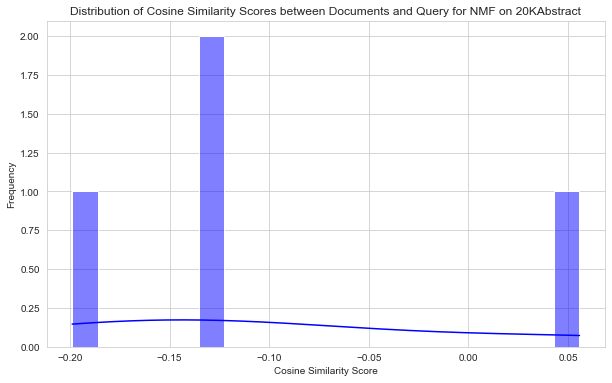

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the cosine similarity scores from the dataframe
cosine_scores = filter_topics_nmf['cosin_similarity_Doc2vec']

# Set the style of the plot
sns.set_style("whitegrid")

# Plot a histogram of the cosine similarity scores
plt.figure(figsize=(10,6))
sns.histplot(cosine_scores, bins=20, kde=True, color='blue')

# Set chart title and labels
plt.title('Distribution of Cosine Similarity Scores between Documents and Query for NMF on 20KAbstract')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Frequency')

# Show plot
plt.show()

In [50]:
#get the most similar doc in dataset to query

In [51]:
# Sort the filter_topics_lda dataframe by cosine similarity score in descending order
filter_topics_nmf = filter_topics_nmf.sort_values(by=['cosin_similarity_Doc2vec'], ascending=False)

# Get the document with the highest cosine similarity score
most_similar_doc = filter_topics_nmf.iloc[0]['Abstract']

most_similar_doc

'the present invention is directed to a video telephony system comprising'

In [52]:
# Sort the filter_topics_lda dataframe by cosine similarity score in descending order
filter_topics_nmf = filter_topics_nmf.sort_values(by=['cosin_similarity_Doc2vec'], ascending=False)

# Get the document with the highest cosine similarity score
most_similar_doc = filter_topics_nmf.iloc[0]['Lemmatized-Abstract']

most_similar_doc

'present directed video telephony'

In [53]:
# Sort the filter_topics_lda dataframe by cosine similarity score in descending order
filter_topics_nmf = filter_topics_nmf.sort_values(by=['cosin_similarity_Doc2vec'], ascending=False)

# Get the document with the highest cosine similarity score
most_similar_doc = filter_topics_nmf.iloc[0]['ID']

most_similar_doc

'US07050084'